In [1]:
import pandas as pd
import numpy as np
pd.pandas.set_option("display.max_columns",None)
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df=df.drop(labels=['ID'],axis=1)

#### Independent and dependent features

In [4]:
x = df.drop(labels=['default.payment.next.month'],axis=1)
y = df[['default.payment.next.month']]

In [5]:
x.shape

(30000, 23)

In [6]:
numerical_cols = x.select_dtypes(exclude='object').columns

In [16]:
numerical_cols

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [7]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols)
])

#### Train test split

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [9]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
import numpy as np
def evaluate_model(true, predicted):
    Accuracy_score = accuracy_score(true,predicted)
    return Accuracy_score

In [17]:
## Train multiple models

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier()
}
trained_model_list=[]
model_list=[]
accuracy_list=[]
y_predict = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    #Make Predictions
    y_pred=model.predict(x_test)

    Accuracy=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    y_predict.append(y_pred)

    print('Model Training Performance')
    print("Accuracy:",Accuracy*100)


    accuracy_list.append(Accuracy)
    
    print('='*35)
    print('\n')

e:\credit card pred\cc_pred\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression
Model Training Performance
Accuracy: 81.39999999999999


DecisionTree
Model Training Performance
Accuracy: 72.64444444444445




C:\Users\shreyash12\AppData\Local\Temp\ipykernel_1920\2805652292.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForest
Model Training Performance
Accuracy: 81.36666666666666




In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

LogisticRegression




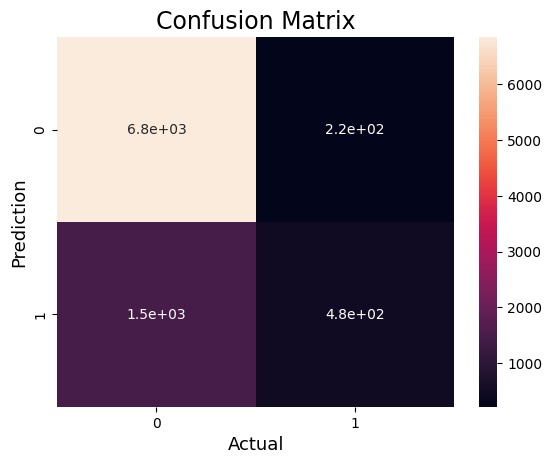

DecisionTree




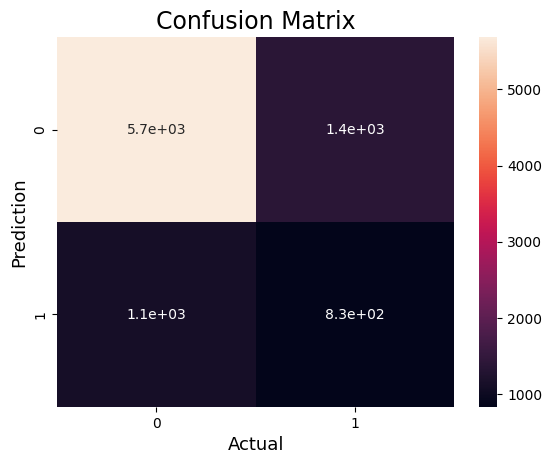

RandomForest




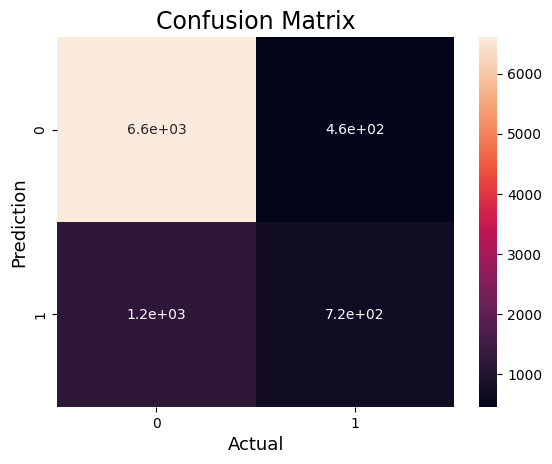

In [14]:
for i in range(len(y_predict)):
    print(list(models.keys())[i])
    cm = confusion_matrix(y_test,y_predict[i])
    sns.heatmap(cm,annot=True)
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    print('\n')
    plt.show()